# Exploration du jeu de données

La base de données sur laquelle nous allons travailler est la base [MNIST](http://yann.lecun.com/exdb/mnist/) qui regroupe un grand nombre de chiffres écrits à la main et leur label correspondant. Voyons à quoi elle ressemble.

Tensorflow propose directement de télécharger ces données via son API sous la forme d'un jeu de données d'entrainement et un jeu de données de test

In [45]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical

In [46]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Structure des données

Les variables x et y sont des tableaux de type numpy.ndarray de 60K lignes pour les données d'entrainement et de 10 000 pour les données de test.

In [47]:
x_train.shape

(60000, 28, 28)

In [48]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [49]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

## Visualisation des données

In [50]:
import matplotlib.pyplot as plt
import random

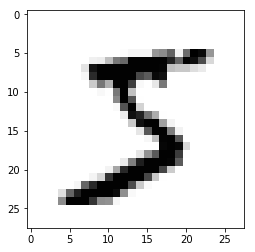

In [51]:
plt.imshow(x_train[0], cmap='Greys')

Visualisation d'une image au hasard dans l'ensemble d'entrainement:

Image numéro 5049
Label associé: y_train[5049] = 7


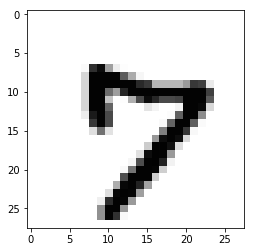

In [52]:
index = random.randrange(60000)+1
print("Image numéro {}".format(index))
print("Label associé: y_train[{}] = {}".format(index,y_train[index]))
plt.imshow(x_train[index], cmap='Greys')

Visualisation d'une image au hasard dans l'ensemble de test:

Image numéro 6480
Label associé: y_test[6480] = 2


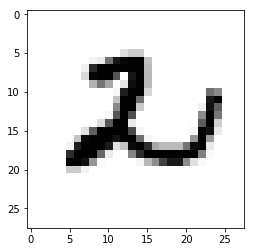

In [53]:
index = random.randrange(10000)+1
print("Image numéro {}".format(index))
print("Label associé: y_test[{}] = {}".format(index,y_test[index]))
plt.imshow(x_test[index], cmap='Greys')

## Y One hot encoded

Tranformation de y en une liste de vecteur de type "one hot encoded": vecteur de la taille de l'ensemble des catégories, toutes les valeurs sont nulles sauf celle qui correspond à sa catégorie qui vaut 1.

In [54]:
y_train[0]

5

In [55]:
y_train = to_categorical(y_train, dtype='int8')

In [56]:
y_train[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int8)

## Création des batchs pour les calculs

In [57]:
batch_X = x_train[0:2]

In [58]:
batch_X.shape

(2, 28, 28)

In [66]:
batch_Y = y_train[0:2]
batch_Y

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int8)

X contient des valeurs entières entre 0 et 255 qui correspondent aux niveaux de gris. On ramnène ses valeurs à des réels entre 0 et 1 pour des questions d'optimisation de l'algorithme.

In [67]:
batch_X = batch_X/255.
batch_X.dtype

dtype('float64')